**Question 1**
**choose website**

In [52]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
import pandas as pd
import time

website = "https://www.ziprecruiter.com/jobs-search?form=jobs-landing&search=data+scientist&location=Queens%2C+NY&lk=&page=1"
path = "/Users/vivianwu/Desktop/Web Scraping/chromedriver"
service = Service(executable_path=path) 
driver = webdriver.Chrome(executable_path=path) 
# open with chromedriver
driver.get(website)
# driver.quit()

**ran into many troubles with linkedin, switching to ziprecruiter**

**Question 2**
Verify whether the website uses JavaScript.
- ran the last cell, linkedin popped up
- went to linkedin home website, clicked inspect
- went into settings, hide javascript under debugger
- some elements do not show proving the website uses Javascript

**Quesiton 3**
**log in to website**

In [ ]:
website = 'https://www.linkedin.com/jobs'
path = "/Users/vivianwu/Desktop/Web Scraping/chromedriver"
service = Service(executable_path=path) 
driver = webdriver.Chrome(executable_path=path) 
# open with chromedriver
driver.get(website)
# driver.quit()

username_field = driver.find_element_by_id('session_key').send_keys(username)
password_field = driver.find_element_by_id('session_password').send_keys(password)
login = driver.find_element_by_css_selector(
    'button[data-id="sign-in-form__submit-btn"]'
)
login.click()

print ("Logged in successfully!")

**used linkedin to demonstrate log in since the username and password format is easier, and I already wrote the code for it when I tried working with linkedin**

**explanation**
- linkedin was open after running the last cell
- used inspect to find the code for username field and password filed
- Found that I can find them by ID or name. I used id and added.send_keys to fill in my username and password
- found login button code by also using inspect
- tried finding it by id or name but didn't work so used css selector
- added `login.click()` so the site can click log in
- added print statement in the end to see if it went through, also confirmed that the website was actually logged in.
- deleted username and password in the end

**Question 4**
**Write a function to implement Infinite Scrolling to automatically scroll the web page and capture the data. Store the collected information in a CSV file named 'Infinite_Scrolling.csv'.**

In [59]:
from selenium import webdriver

website = 'https://quotes.toscrape.com/scroll'
path = "/Users/vivianwu/Desktop/Web Scraping/chromedriver"
service = Service(executable_path=path) 
driver = webdriver.Chrome(executable_path=path) 
# open with chromedriver
driver.get(website)
# driver.quit()

def infinite_scrolling(driver):
    quotes = []

    time.sleep(2)

    for _ in range(10):
        prev_len = len(quotes)

        # scroll to bottom
        driver.execute_script(
            "window.scrollTo(0, document.body.scrollHeight);"
        )
        time.sleep(2)

        # collect quotes
        quote_elements = driver.find_elements(By.CLASS_NAME, "quote")

        for q in quote_elements:
            text = q.find_element(By.CLASS_NAME, "text").text
            if text not in quotes:
                quotes.append(text)

        # stop if no new quotes loaded
        if len(quotes) == prev_len:
            break

    # save to CSV
    pd.DataFrame(quotes, columns=["Quote"]).to_csv(
        "Infinite_Scrolling.csv", index=False
    )

    print(f"Saved {len(quotes)} quotes")

    return quotes

infinite_scrolling (driver)[:5]

Saved 100 quotes


['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"]

**explanation**
**also spoke to Professor about this question. It was not working with any of the websites I tried to use. She suggested I use another website as long as I demonstrate the infinite scrolling is working**

**Question 5**
**Write a function to scrape data from multiple web pages on the chosen website and save the collected information in a CSV file named 'Multiple_Pages.csv'**

In [16]:
import time
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def scrape_multiple_pages(driver, number_of_pages):
    jobs = []

    for page in range(number_of_pages):

        # wait for job listings to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located(
                (By.XPATH, "//div[@class = 'flex flex-col']")
            )
        )

        job_listings = driver.find_elements_by_xpath(
            "//div[@class = 'flex flex-col']"
        )

        for job in job_listings:
            title = job.find_element_by_xpath(".//h2[contains(@class,'text-header')]").text

            jobs.append(title)

        # click Next button
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable(
                (By.XPATH, "//button[@title ='Next Page']")
            ))
        next_button.click()

        time.sleep(3)  # allow next page to load

    # save to CSV
    df = pd.DataFrame(jobs, columns=["Job Title"])
    df = df.drop_duplicates()
    df.to_csv("Multiple_Pages.csv", index=False)

    print("Successfully saved Multiple_Pages.csv")

    return df

In [17]:
scrape_multiple_pages (driver, 3)

Successfully saved Multiple_Pages.csv


,Job Title
0,Data Scientist (part-time work from home)
1,"Data Scientist, Product"
2,Data Scientist III - Financial Crimes Modeling
3,Senior Data Scientist
4,Staff Data Scientist - Marketing Analytics
5,Data Scientist (Hybrid as needed)
6,Data Scientist
8,Health Data Science Junior Research Scientist
9,GenAI Data Scientist/W2 ONLY/NYC LOCAL ONLY /F...
10,"Data Scientist, Tempus Discover"


**explanation**
- scraped job title from multiple pages on ziprecruiter
- found job card first
- loop through it
- extract job title xpath from each loop
- click on the button (next page) after getting title)
- return to beginning of loop till it ends
- save to csv

**Question 6**
**Write a function to get links listed in the website. Save the collected information in a CSV file named 'Links.csv' (1 points)**


In [231]:
def get_links(driver):
    all_links = []
    links = driver.find_elements(By.XPATH, "//a[@href]")
    for each_link in links:
        href = each_link.get_attribute("href")
        if href:
            all_links.append(href)
    return all_links

all_links = get_links(driver)

# Create df for all_links
df = pd.DataFrame(all_links, columns=["Link"])
df.to_csv("Links.csv", index=False, encoding="utf-8")
print(f"Saved {len(all_links)} links to Links.csv")

Saved 67 links to Links.csv


In [3]:
import pandas as pd
df = pd.read_csv('links.csv')
df.head()

,Link
0,https://www.ziprecruiter.com/jobs-search?form=...
1,https://www.ziprecruiter.com/
2,https://www.ziprecruiter.com/authn/login?realm...
3,https://www.ziprecruiter.com/jobs-search
4,https://www.ziprecruiter.com/authn/login?realm...


**explanation**
- create empty list for all links to add to
- define links xpath
- loop through each link and get the url
- add to csv

**Question 7**

**Search for "Data Scientist" job listings. Collect data from a minimum of 40 different web pages (or 40 jobs). Gather specific information such as Job Titles, Company Details, Salary Range (if applicable), the Date the job was posted and the Number of Applicants that have applied.  Save the collected information in a CSV file named 'Data_Scientist_Jobs.csv' (4 points)**

In [26]:
# from selenium.common.exceptions import NoSuchElementException
# from selenium.webdriver.common.by import By
# import re

# job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]")

# for job in job_listings:
#     # # click the job TITLE button
#     # title_button = job.find_element(
#     #     By.XPATH, ".//div[@class = 'flex flex-col']"
#     # )
#     # title_button.click()

#     # time.sleep(4)
    
#     try:
#         salary = job.find_element(By.XPATH, ".//*[contains(text(),'$')]").text
    
#     except NoSuchElementException:
#         continue

#     print (date_posted)

**was using this cell above to test if each of my xpath is correct. I tested each of the things I need to find in the function below and printed them to make sure when the function runs, the xpath would be correct**

In [45]:
def scrape_data_scientist_jobs(number_of_pages):
    jobs = []
    for page in range(number_of_pages):
        time.sleep(3)
        job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]")
        num_jobs = len(job_listings)
        print(f"Page {page+1}: Found {num_jobs} jobs")
        
        for i in range(num_jobs):
            try:
                # Re-find job listings
                job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]")
                job = job_listings[i]
                
                # Extract data from job card
                title = job.find_element(By.XPATH, ".//h2[contains(@class,'text-header')]").text
                company = job.find_element(By.XPATH, ".//a[@data-testid='job-card-company']").text

                #extract salary from job card
                try:
                    salary = job.find_element(By.XPATH, ".//*[contains(text(),'$')]").text
                except:
                    salary = "Not specified"

                #location from job card
                try:
                    location = job.find_element(By.XPATH, ".//a[@data-testid='job-card-location']").text
                except:
                    location = "Not specified"
                
                print(f"\nJob {i+1}: {title[:50]}")
                
                # clicking on Job title to show details panel on the right
                try:
                    title_element = job.find_element(By.XPATH, ".//h2[contains(@class,'text-header')]")
                    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", title_element)
                    time.sleep(0.5)
                    driver.execute_script("arguments[0].click();", title_element)
                    time.sleep(3)
                except:
                    # if it doesn't work, click on the articles
                    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", job)
                    time.sleep(0.5)
                    driver.execute_script("arguments[0].click();", job)
                    time.sleep(3)

                # RIGHT SIDE PANEL
                # Extract date_posted
                try:
                    date_posted = driver.find_element(
                        By.XPATH, "//p[contains(@class, 'text-primary') and contains(@class, 'text-body-md') and contains(text(), 'Posted')]"
                    ).text
                    print(f"  Date: {date_posted}")
                except:
                    date_posted = "Not specified"
                    print(f"  Date: Not found")
                
                jobs.append({
                    'Job Title': title,
                    'Company': company,
                    'Salary': salary,
                    'Date Posted': date_posted,
                    'Location': location
                })
                
            except Exception as e:
                print(f"Error processing job {i+1}: {e}")
                continue
        
        # Navigate to next page
        try:
            next_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//button[@title='Next Page']"))
            )
            driver.execute_script("arguments[0].click();", next_button)
            time.sleep(3)
        except Exception as e:
            print(f"No more pages or error: {e}")
            break
    
    # Save to CSV
    df = pd.DataFrame(jobs)
    df.to_csv('Data_Scientist_Jobs.csv', index=False)
    print(f"\nSaved {len(jobs)} jobs to Data_Scientist_Jobs.csv")

scrape_data_scientist_jobs(2)

Page 1: Found 21 jobs

Job 1: Data Scientist (part-time work from home)
  Date: Not found

Job 2: Data Scientist, Product
  Date: Posted 5 hours ago

Job 3: Data Scientist III - Financial Crimes Modeling
  Date: Posted 22 hours ago

Job 4: Senior Data Scientist
  Date: Posted 3 days ago

Job 5: Staff Data Scientist - Marketing Analytics
  Date: Posted 15 days ago

Job 6: Data Scientist (Hybrid as needed)
  Date: Posted 6 days ago

Job 7: Data Scientist
  Date: Posted 10 days ago

Job 8: Data Scientist
  Date: Posted 18 days ago

Job 9: Health Data Science Junior Research Scientist
  Date: Posted 9 days ago

Job 10: GenAI Data Scientist/W2 ONLY/NYC LOCAL ONLY /Finan
  Date: Posted 6 days ago

Job 11: Data Scientist, Tempus Discover
  Date: Posted 5 days ago

Job 12: Sr. Data Scientist
  Date: Posted 9 days ago

Job 13: Data Scientist
  Date: Posted 26 days ago

Job 14: Data Scientist II
  Date: Posted 4 days ago

Job 15: Senior Data Scientist (NYC)
  Date: Posted yesterday

Job 16: Data

**explanation**
- created empty list to add all jobs to
- loop through each page
- find job card
- loop through job card
- find xpath for title, company, salary, location (these are in the job card so they are easy to find)
- click on the job card next to show details of each card since some info is on the right side panel of the page
- extract date_posted from the right side of the page
- append it to the empty list
- click on the next page till loop ends
- save to CSV
- tried function

**Question 8**

For "Data Scientist" job, analyze the data from website and extract at least two meaningful insights. For instance, write a function to create a plot that illustrates the relationship between the number of company followers and job salary or the number of employees and the number of company followers. Note: If there is a range of the number of employees (e.g., 1,001-5,000 employees), choose the smaller value. (2 points)

In [49]:
# Reading the CSV made from the last question
df = pd.read_csv('Data_Scientist_Jobs.csv')

# Add Employees column if it doesn't exist
if 'Employees' not in df.columns:
    df['Employees'] = "Not specified"

print(f"Total jobs in CSV: {len(df)}")

# Making sure to start on page 1 of the search results
row_index = 0
number_of_pages = 2  

for page in range(number_of_pages):
    time.sleep(3)
    job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]") #job card on left
    num_jobs_on_page = len(job_listings)
    print(f"\nPage {page+1}: Found {num_jobs_on_page} jobs")
    
    for i in range(num_jobs_on_page):  # Use num_jobs_on_page instead of len(job_listings)
        if row_index >= len(df):
            print("All rows processed!")
            break
            
        # Re-find job listings to avoid stale elements
        job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]")
        
        # Check if index is still valid
        if i >= len(job_listings):
            print(f"  Skipping - index {i} out of range")
            continue
            
        job = job_listings[i]
        
        # Click the job to show detail panel
        try:
            title_element = job.find_element(By.XPATH, ".//h2[contains(@class,'text-header')]")
            driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", title_element)
            time.sleep(0.5)
            driver.execute_script("arguments[0].click();", title_element)
            time.sleep(2)
        except Exception as e:
            print(f"  Job {row_index + 1}: Could not click - {e}")
            row_index += 1
            continue
        
        # Extract employees from right panel
        try:
            employees = driver.find_element(
                By.XPATH, 
                "//p[contains(@class, 'text-primary') and contains(text(), 'Employees')]"
            ).text
            df.at[row_index, 'Employees'] = employees
            print(f"  Job {row_index + 1}: {df.at[row_index, 'Job Title'][:40]} - {employees}")
        except:
            print(f"  Job {row_index + 1}: No employee data")
        
        row_index += 1
    
    if row_index >= len(df):
        break
    
    # Go to next page
    try:
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[@title='Next Page']"))
        )
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(3)
    except Exception as e:
        print(f"No more pages: {e}")
        break

# Save the updated CSV
df.to_csv('Data_Scientist_Jobs.csv', index=False)
print(f"\n✓ Updated CSV saved!")
print(f"Total jobs processed: {row_index}")
print(f"Jobs with employee data: {(df['Employees'] != 'Not specified').sum()}")
print(df[['Job Title', 'Company', 'Employees']].head(10))

Total jobs in CSV: 40

Page 1: Found 21 jobs
  Job 1: Data Scientist (part-time work from home - 10,000+ Employees
  Job 2: Data Scientist, Product - 11 - 50 Employees
  Job 3: No employee data
  Job 4: No employee data
  Job 5: Staff Data Scientist - Marketing Analyti - 51 - 200 Employees
  Job 6: Data Scientist (Hybrid as needed) - 201 - 500 Employees
  Job 7: Data Scientist - 10,000+ Employees
  Job 8: Data Scientist - 201 - 500 Employees
  Job 9: Health Data Science Junior Research Scie - 51 - 200 Employees
  Job 10: GenAI Data Scientist/W2 ONLY/NYC LOCAL O - 10,000+ Employees
  Job 11: Data Scientist, Tempus Discover - 11 - 50 Employees
  Job 12: No employee data
  Job 13: No employee data
  Job 14: No employee data
  Job 15: Senior Data Scientist (NYC) - 1,001 - 5,000 Employees
  Job 16: No employee data
  Job 17: Data Scientist, Demand Forecasting - 11 - 50 Employees
  Job 18: No employee data
  Job 19: No employee data
  Job 20: No employee data
  Skipping - index 20 out of ran

=== Data Overview ===
Total jobs: 40
Columns: ['Job Title', 'Company', 'Salary', 'Date Posted', 'Location', 'Employees']

First 5 rows:
                                        Job Title         Company  \
0       Data Scientist (part-time work from home)  DataAnnotation   
1                         Data Scientist, Product       US Mobile   
2  Data Scientist III - Financial Crimes Modeling              Td   
3                           Senior Data Scientist    QED National   
4      Staff Data Scientist - Marketing Analytics         Headway   

                  Salary          Date Posted      Location  \
0           $40 - $50/hr        Not specified  New York, NY   
1       $120K - $190K/yr   Posted 5 hours ago  New York, NY   
2  $96.13K - $155.95K/yr  Posted 22 hours ago  New York, NY   
3           $50 - $58/hr    Posted 3 days ago  New York, NY   
4               $325/day   Posted 15 days ago  New York, NY   

            Employees  
0   10,000+ Employees  
1   11 - 50 Employees 

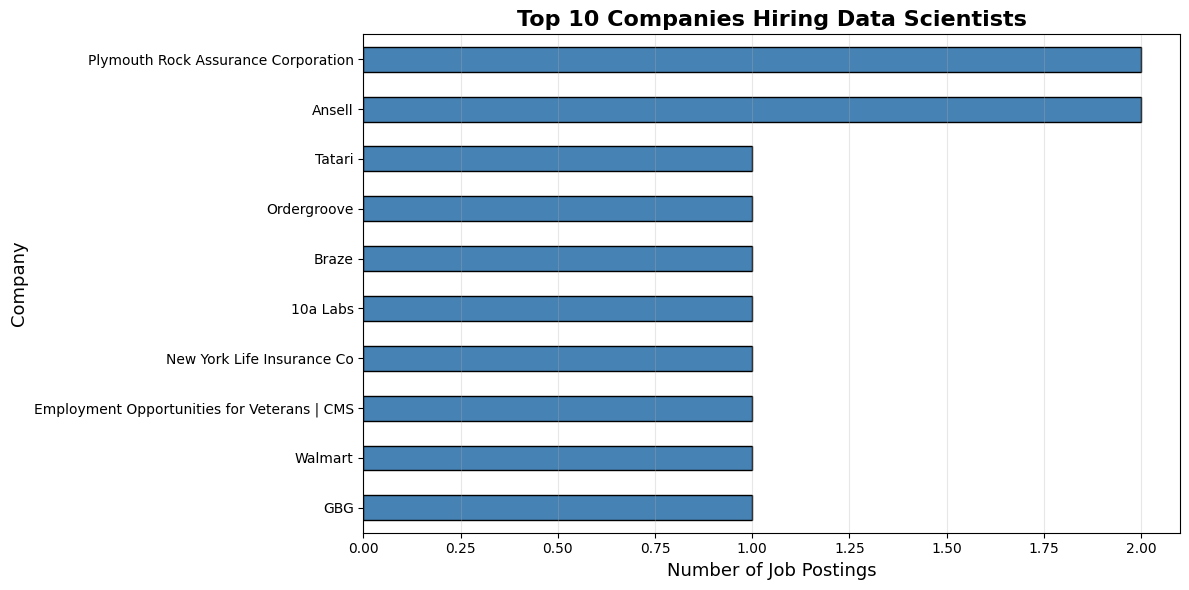


Key Finding: Plymouth Rock Assurance Corporation is hiring the most with 2 openings


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Read your CSV
df = pd.read_csv('Data_Scientist_Jobs.csv')

print("=== Data Overview ===")
print(f"Total jobs: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

# Function to extract numeric salary (takes the lower value from range)
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == "Not specified":
        return None
    # Remove commas and extract numbers
    salary_str = str(salary_str).replace(',', '')
    numbers = re.findall(r'\d+\.?\d*', salary_str)
    if numbers:
        return float(numbers[0])  # Return first (smaller) number
    return None

# Function to extract numeric employees (takes the lower value from range)
def extract_employees(emp_str):
    if pd.isna(emp_str) or emp_str == "Not specified":
        return None
    # Remove commas and plus signs
    emp_str = str(emp_str).replace(',', '').replace('+', '')
    numbers = re.findall(r'\d+', emp_str)
    if numbers:
        return int(numbers[0])  # Return first (smaller) number
    return None

# Add numeric columns
df['Salary_Numeric'] = df['Salary'].apply(extract_salary)
df['Employees_Numeric'] = df['Employees'].apply(extract_employees)

print("\n=== Data Summary ===")
print(f"Jobs with salary data: {df['Salary_Numeric'].notna().sum()}")
print(f"Jobs with employee data: {df['Employees_Numeric'].notna().sum()}")
print(f"Unique companies: {df['Company'].nunique()}")
print(f"Unique locations: {df['Location'].nunique()}")

# insight 1: top companies hiring data scientist

print("\n" + "="*70)
print("INSIGHT 1: Top Companies Hiring Data Scientists")
print("="*70)

plt.figure(figsize=(12, 6))
top_companies = df['Company'].value_counts().head(10)
print(top_companies)

top_companies.plot(kind='barh', color='steelblue', edgecolor='black') #horizontal bar
plt.title('Top 10 Companies Hiring Data Scientists', fontsize=16, fontweight='bold')
plt.xlabel('Number of Job Postings', fontsize=13)
plt.ylabel('Company', fontsize=13)
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.savefig('Insight1_Top_Companies.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKey Finding: {top_companies.index[0]} is hiring the most with {top_companies.values[0]} openings")



INSIGHT 2: Salary Distribution and Statistics


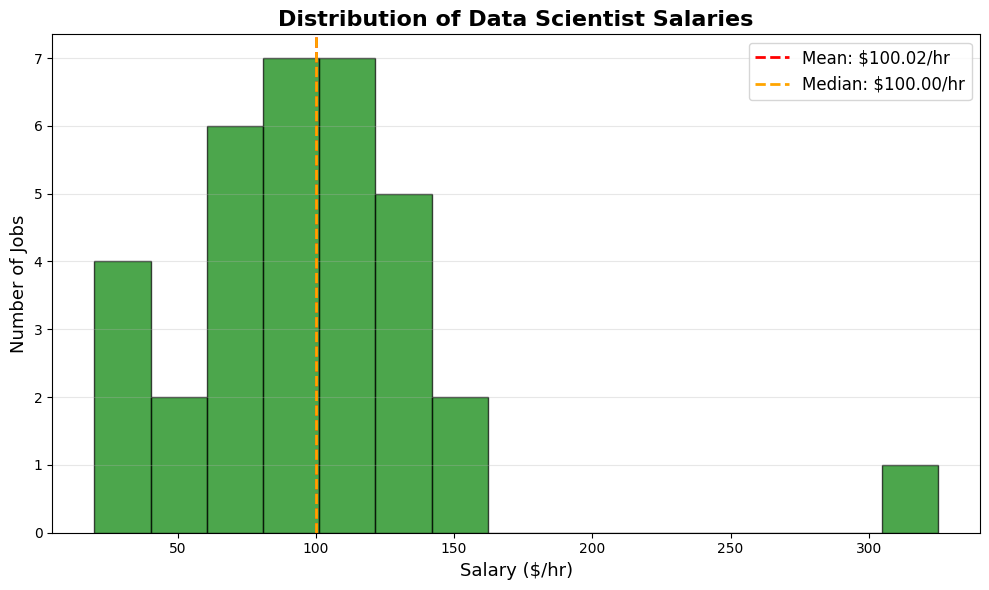


Salary Statistics:
  Mean salary: $100.02/hr ($208034.26/year)
  Median salary: $100.00/hr ($208000.00/year)
  Min salary: $19.84/hr
  Max salary: $325.00/hr
  Range: $305.16/hr

Key Finding: The average Data Scientist earns $100.02/hr


In [51]:
# ===================================================================
# INSIGHT 2: Salary Distribution and Statistics
# ===================================================================
print("\n" + "="*70)
print("INSIGHT 2: Salary Distribution and Statistics")
print("="*70)

df_with_salary = df.dropna(subset=['Salary_Numeric'])

if len(df_with_salary) > 0:
    plt.figure(figsize=(10, 6))
    
    plt.hist(df_with_salary['Salary_Numeric'], bins=15, color='green', 
             edgecolor='black', alpha=0.7)
    plt.xlabel('Salary ($/hr)', fontsize=13)
    plt.ylabel('Number of Jobs', fontsize=13)
    plt.title('Distribution of Data Scientist Salaries', fontsize=16, fontweight='bold')
    
    # Calculate statistics
    mean_salary = df_with_salary['Salary_Numeric'].mean()
    median_salary = df_with_salary['Salary_Numeric'].median()
    min_salary = df_with_salary['Salary_Numeric'].min()
    max_salary = df_with_salary['Salary_Numeric'].max()
    
    # Add mean and median lines
    plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: ${mean_salary:.2f}/hr')
    plt.axvline(median_salary, color='orange', linestyle='--', linewidth=2, 
                label=f'Median: ${median_salary:.2f}/hr')
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('Insight2_Salary_Distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nSalary Statistics:")
    print(f"  Mean salary: ${mean_salary:.2f}/hr (${mean_salary*2080:.2f}/year)")
    print(f"  Median salary: ${median_salary:.2f}/hr (${median_salary*2080:.2f}/year)")
    print(f"  Min salary: ${min_salary:.2f}/hr")
    print(f"  Max salary: ${max_salary:.2f}/hr")
    print(f"  Range: ${max_salary - min_salary:.2f}/hr")
    
    print(f"\nKey Finding: The average Data Scientist earns ${mean_salary:.2f}/hr")
else:
    print("Not enough salary data for analysis")

**explanation**
- added employees column to the CSV saved in Question 7 first in order to extract insight
- same process as Question 7 getting employees number from the RIGHT PANEL of the page
**Insight number 1: determine what the top companies hiring data scientist are**
- convert salary and employee number to int first
- used a horizontal bar chart
- plot with matplotlib
- took ChatGPT's suggestion in formatting and converting the salary/ employee with functions ("ChatGPT", 5.2, 2026)
**Insight number 2: Distribution of Data Scientist Salary**
- first filter job with salary info
- create bar chart of how many jobs in each salary range
- calculate mean/median lines to pot on visual
- Also took ChatGPT's suggestion in formatting the overall visualization and functions ("ChatGPT", 5.2, 2026)

**Question 9**

Use regular expressions to extract the job titles that require "AWS" skills. Create a CSV file with two columns: the first column for job titles and the second column for skills that contain the word "AWS." Save the file as "Jobs_AWS_Skills.csv." (2 points)

In [57]:
import re
import pandas as pd
from selenium.webdriver.common.by import By

# Regular expression to find sentences/phrases containing "AWS"
aws_sentence_pattern = re.compile(
    r"([^.]*\bAWS\b[^.]*\.?)",
    re.IGNORECASE
)

jobs_AWS_Skills = []

# Make sure on page 1 of the job search
number_of_pages = 2  # How many pages to scrape

for page in range(number_of_pages):
    time.sleep(3)
    job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]")
    num_jobs = len(job_listings)
    print(f"Page {page+1}: Processing {num_jobs} jobs...", end=" ")
    
    aws_count_page = 0
    
    for i in range(num_jobs):
        try:
            # Re-find job listings to avoid stale elements
            job_listings = driver.find_elements(By.XPATH, "//article[contains(@class,'flex-col')]")
            job = job_listings[i]
            
            # Get job title from the job card
            job_title = job.find_element(By.XPATH, ".//h2[contains(@class,'text-header')]").text
            
            # Click to open detail panel
            title_element = job.find_element(By.XPATH, ".//h2[contains(@class,'text-header')]")
            driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", title_element)
            time.sleep(0.5)
            driver.execute_script("arguments[0].click();", title_element)
            time.sleep(2)
            
            # Get the full job description from the detail panel
            try:
                job_description = driver.find_element(By.TAG_NAME, "main").text
            except:
                job_description = driver.find_element(By.TAG_NAME, "body").text
            
            # Check if "AWS" is in the job description
            if "AWS" in job_description.upper():
                aws_count_page += 1
                
                # Extract all sentences/phrases containing "AWS"
                matches = aws_sentence_pattern.findall(job_description)
                
                if matches:
                    for match in matches:
                        skill = match.strip()
                        if skill:
                            jobs_AWS_Skills.append({
                                "Job Title": job_title,
                                "AWS Skill": skill
                            })
            
        except Exception as e:
            continue
    
    print(f"Found {aws_count_page} jobs with AWS")
    
    # Navigate to next page
    try:
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[@title='Next Page']"))
        )
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(3)
    except:
        break

# Create DataFrame and save to CSV
df_aws = pd.DataFrame(jobs_AWS_Skills)

if len(df_aws) > 0:
    df_aws.to_csv('Jobs_AWS_Skills.csv', index=False)
    print(f"\n✓ SUCCESS! Saved {len(df_aws)} AWS skill entries from {df_aws['Job Title'].nunique()} unique jobs")
    print("\nFirst 5 entries:")
else:
    print("\n✗ No jobs with AWS skills found")

Page 1: Processing 20 jobs... Found 20 jobs with AWS
Page 2: Processing 21 jobs... Found 20 jobs with AWS

✓ SUCCESS! Saved 239 AWS skill entries from 38 unique jobs

First 5 entries:


In [58]:
df_aws.head()

,Job Title,AWS Skill
0,Data Scientist,"628 Aws jobs in Borough of Queens, New York, N..."
1,Data Scientist,"LLC\nFull Stack Developer with AWS\nNewark, NJ..."
2,Data Scientist,50K/yr\nEstimated pay\nCast AI\nAlliances Mana...
3,Data Scientist,40K/yr\nEstimated pay\nAscendion\nGoLang Devel...
4,Data Scientist,Preferred Skills:\nExperience with cloud platf...


**explanation**

- first input regex to find AWS
- loop through job card like previous questions
- click on job card to open right side panel
- get job description and search for AWS using the regex pattern in the beginning
- go to next page until number of pages intended ends
- save to CSV
- printed first few lines of df to show AWS skills

**Reference list:**

OpenAI. (2026). ChatGPT (5.2) [Large language model]. https://chat.openai.com/